3. DATA PREPARATION

3.1 Merging Datasets

In [1]:
import pandas as pd
import numpy as np

loading the data

In [2]:

admissions = pd.read_csv('data/hosp/admissions.csv')
omr = pd.read_csv('data/hosp/omr.csv')
diagnoses = pd.read_csv('data/hosp/diagnoses_icd.csv')
services = pd.read_csv('data/hosp/services.csv')
labevents = pd.read_csv('data/hosp/labevents.csv')
patients=pd.read_csv("data/hosp/patients.csv")
diagnoses2=pd.read_csv("data/hosp/d_icd_diagnoses.csv")
prescriptions=pd.read_csv("data/hosp/prescriptions.csv")

In [3]:
admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0


In [4]:
omr.head()

,subject_id,chartdate,seq_num,result_name,result_value
0,10011398,2146-12-01,1,Height (Inches),63
1,10011398,2147-01-22,1,Weight (Lbs),127
2,10011398,2146-12-01,1,Weight (Lbs),135
3,10011398,2147-07-24,1,Weight (Lbs),136
4,10011398,2147-03-26,1,Weight (Lbs),136


In [5]:
patients.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10014729,F,21,2125,2011 - 2013,NaN
1,10003400,F,72,2134,2011 - 2013,2137-09-02
2,10002428,F,80,2155,2011 - 2013,NaN
3,10032725,F,38,2143,2011 - 2013,2143-03-30
4,10027445,F,48,2142,2011 - 2013,2146-02-09


In [6]:
prescriptions.head()

,subject_id,hadm_id,pharmacy_id,poe_id,poe_seq,order_provider_id,starttime,stoptime,drug_type,drug,...,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,10027602,28166872,27168639,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Fentanyl Citrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10027602,28166872,40720238,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Fentanyl Citrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10027602,28166872,62845687,NaN,NaN,NaN,2201-10-31 12:00:00,NaN,MAIN,Lorazepam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10027602,28166872,24340150,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Midazolam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10027602,28166872,14435820,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Midazolam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
labevents.head()

,labevent_id,subject_id,hadm_id,specimen_id,itemid,order_provider_id,charttime,storetime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,priority,comments
0,172061,10014354,29600294.0,1808066,51277,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,15.4,15.40,%,10.5,15.5,NaN,ROUTINE,NaN
1,172062,10014354,29600294.0,1808066,51279,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,3.35,3.35,m/uL,4.6,6.1,abnormal,ROUTINE,NaN
2,172068,10014354,29600294.0,1808066,52172,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,49.7,49.70,fL,35.1,46.3,abnormal,ROUTINE,NaN
3,172063,10014354,29600294.0,1808066,51301,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,20.3,20.30,K/uL,4.0,10.0,abnormal,ROUTINE,NaN
4,172050,10014354,29600294.0,1808066,51249,NaN,2148-08-16 00:00:00,2148-08-16 01:30:00,31.1,31.10,g/dL,32.0,37.0,abnormal,ROUTINE,NaN


In [8]:
services.head()

,subject_id,hadm_id,transfertime,prev_service,curr_service
0,10001725,25563031,2110-04-11 15:09:36,NaN,GYN
1,10019003,28003918,2148-12-21 03:32:53,NaN,GYN
2,10007818,22987108,2146-06-10 16:38:18,NaN,MED
3,10004235,24181354,2196-02-24 14:39:31,NaN,MED
4,10026255,22059910,2201-07-07 18:16:14,NaN,MED


In [9]:
diagnoses.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10035185,22580999,3,4139,9
1,10035185,22580999,10,V707,9
2,10035185,22580999,1,41401,9
3,10035185,22580999,9,3899,9
4,10035185,22580999,11,V8532,9


In [10]:
diagnoses2.head()

,icd_code,icd_version,long_title
0,0090,9,"Infectious colitis, enteritis, and gastroenter..."
1,01160,9,"Tuberculous pneumonia [any form], unspecified"
2,01186,9,"Other specified pulmonary tuberculosis, tuberc..."
3,01200,9,"Tuberculous pleurisy, unspecified"
4,01236,9,"Tuberculous laryngitis, tubercle bacilli not f..."


In [11]:
merged_diagnoses= pd.merge(diagnoses, diagnoses2, on=['icd_code', 'icd_version'], how='left')
merged_diagnoses.drop(["icd_code", "icd_version","seq_num"],axis=1,inplace=True)
merged_diagnoses.head()


,subject_id,hadm_id,long_title
0,10035185,22580999,Other and unspecified angina pectoris
1,10035185,22580999,Examination of participant in clinical trial
2,10035185,22580999,Coronary atherosclerosis of native coronary ar...
3,10035185,22580999,Unspecified hearing loss
4,10035185,22580999,"Body Mass Index 32.0-32.9, adult"


In [12]:
death_df=admissions[["subject_id","hadm_id","deathtime"]]
death_df["died"]=death_df["deathtime"].isna()==False
death_df.drop("deathtime",axis=1,inplace=True)
death_df.head()

C:\Users\Calvine Mugunda\AppData\Local\Temp\ipykernel_15740\4074254231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_df["died"]=death_df["deathtime"].isna()==False
C:\Users\Calvine Mugunda\AppData\Local\Temp\ipykernel_15740\4074254231.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  death_df.drop("deathtime",axis=1,inplace=True)


,subject_id,hadm_id,died
0,10004235,24181354,False
1,10009628,25926192,False
2,10018081,23983182,False
3,10006053,22942076,True
4,10031404,21606243,False


In [13]:
#Merge the death df with the merged diagnoses dataframe

merged_df=pd.merge(merged_diagnoses, death_df, on=["subject_id","hadm_id"], how="left")
merged_df["died"].fillna(False, inplace=True)
diagnoses_death_df=merged_df
diagnoses_death_df

C:\Users\Calvine Mugunda\AppData\Local\Temp\ipykernel_15740\4166345729.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df["died"].fillna(False, inplace=True)


,subject_id,hadm_id,long_title,died
0,10035185,22580999,Other and unspecified angina pectoris,False
1,10035185,22580999,Examination of participant in clinical trial,False
2,10035185,22580999,Coronary atherosclerosis of native coronary ar...,False
3,10035185,22580999,Unspecified hearing loss,False
4,10035185,22580999,"Body Mass Index 32.0-32.9, adult",False
...,...,...,...,...
4501,10004733,27411876,Unspecified disturbance of conduct,False
4502,10004733,27411876,"Anxiety state, unspecified",False
4503,10004733,27411876,Unspecified sinusitis (chronic),False
4504,10004733,27411876,Diverticulosis of colon (without mention of he...,False


In [14]:
# merging the filtered_df dataframe with the diagnoses_death_df dataframe using the subject_id column as the key. 
filtered_df=patients[["subject_id","gender","anchor_age"]]
diagnoses_death_df=pd.merge(filtered_df, diagnoses_death_df, on="subject_id", how="right")
#rename anchor_age to age

diagnoses_death_df.rename(columns={"anchor_age":"age"}, inplace=True)
diagnoses_death_df

,subject_id,gender,age,hadm_id,long_title,died
0,10035185,M,70,22580999,Other and unspecified angina pectoris,False
1,10035185,M,70,22580999,Examination of participant in clinical trial,False
2,10035185,M,70,22580999,Coronary atherosclerosis of native coronary ar...,False
3,10035185,M,70,22580999,Unspecified hearing loss,False
4,10035185,M,70,22580999,"Body Mass Index 32.0-32.9, adult",False
...,...,...,...,...,...,...
4501,10004733,M,51,27411876,Unspecified disturbance of conduct,False
4502,10004733,M,51,27411876,"Anxiety state, unspecified",False
4503,10004733,M,51,27411876,Unspecified sinusitis (chronic),False
4504,10004733,M,51,27411876,Diverticulosis of colon (without mention of he...,False


In [15]:
admissions

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,10038992,24745425,2187-07-29 01:05:00,2187-08-03 17:02:00,NaN,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
271,10008287,22168393,2145-09-28 01:17:00,2145-10-02 13:35:00,NaN,SURGICAL SAME DAY ADMISSION,P898NM,PHYSICIAN REFERRAL,HOME HEALTH CARE,Other,ENGLISH,SINGLE,WHITE,NaN,NaN,0
272,10022880,27708593,2177-03-12 07:15:00,2177-03-19 14:25:00,NaN,SURGICAL SAME DAY ADMISSION,P99698,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
273,10004457,23251352,2141-12-17 11:00:00,2141-12-21 15:56:00,NaN,SURGICAL SAME DAY ADMISSION,P41R5N,PHYSICIAN REFERRAL,REHAB,Medicare,ENGLISH,SINGLE,OTHER,NaN,NaN,0


In [16]:

length_of_stay_df =diagnoses_death_df.copy()
admissions_filtered_df=admissions[["subject_id","hadm_id","admittime","dischtime","marital_status","race","admission_type","admission_location"]]
length_of_stay_df=pd.merge(admissions_filtered_df, length_of_stay_df, on=["subject_id","hadm_id"],how="right")
#convert admittime to datetime format

length_of_stay_df["admittime"]=pd.to_datetime(length_of_stay_df["admittime"])
length_of_stay_df["dischtime"]=pd.to_datetime(length_of_stay_df["dischtime"])

#calculate the length of stay in days

length_of_stay_df["length_of_stay"]=length_of_stay_df["dischtime"]-length_of_stay_df["admittime"]
length_of_stay_df["length_of_stay"]=length_of_stay_df["length_of_stay"].dt.days

length_of_stay_df



,subject_id,hadm_id,admittime,dischtime,marital_status,race,admission_type,admission_location,gender,age,long_title,died,length_of_stay
0,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Other and unspecified angina pectoris,False,5
1,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Examination of participant in clinical trial,False,5
2,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Coronary atherosclerosis of native coronary ar...,False,5
3,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Unspecified hearing loss,False,5
4,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,"Body Mass Index 32.0-32.9, adult",False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Unspecified disturbance of conduct,False,23
4502,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,"Anxiety state, unspecified",False,23
4503,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Unspecified sinusitis (chronic),False,23
4504,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Diverticulosis of colon (without mention of he...,False,23


In [17]:
admissions.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0


In [18]:
#merging specific features from the prescriptions csv
prescriptions_df=length_of_stay_df.copy()
filtered_readmission_df =prescriptions[["subject_id","hadm_id","drug_type","drug"]]
r_df=pd.merge(filtered_readmission_df, prescriptions_df, on=["subject_id","hadm_id"],how="left")
#dropping duplicates from the readmission_df
prescriptions_df.drop_duplicates(inplace=True)
prescriptions_df


,subject_id,hadm_id,admittime,dischtime,marital_status,race,admission_type,admission_location,gender,age,long_title,died,length_of_stay
0,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Other and unspecified angina pectoris,False,5
1,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Examination of participant in clinical trial,False,5
2,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Coronary atherosclerosis of native coronary ar...,False,5
3,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Unspecified hearing loss,False,5
4,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,"Body Mass Index 32.0-32.9, adult",False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Unspecified disturbance of conduct,False,23
4502,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,"Anxiety state, unspecified",False,23
4503,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Unspecified sinusitis (chronic),False,23
4504,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Diverticulosis of colon (without mention of he...,False,23


In [19]:
#Useful for TimeSeries
df=admissions.copy()
df.admittime = pd.to_datetime(df.admittime)   
df.dischtime = pd.to_datetime(df.dischtime)

df1 = df.groupby([df.admittime.dt.year, df.admittime.dt.month]).count().rename_axis(['year', 'month'])['admittime'].reset_index(name='Entries')

df1

,year,month,Entries
0,2110,4,1
1,2110,11,1
2,2111,1,1
3,2111,11,1
4,2112,9,1
...,...,...,...
217,2201,2,1
218,2201,3,1
219,2201,7,1
220,2201,10,1


In [20]:
admissions.duplicated().value_counts()

False    275
Name: count, dtype: int64

In [21]:
#Calculating the number of readmissions for each subject_id using a readmission threshold of 30 days
readmissions_df= admissions[["subject_id","hadm_id","admittime","dischtime"]].copy()


readmissions_df['admittime'] = pd.to_datetime(readmissions_df['admittime'])
readmissions_df['dischtime'] = pd.to_datetime(readmissions_df['dischtime'])

# Assuming df is your dataframe and readmission_threshold is defined
readmission_threshold = pd.Timedelta(days=30)

# Sort by subject_id, admittime
readmissions_df = readmissions_df.sort_values(by=['subject_id', 'admittime'])

# Calculate the time to next admission and determine if it's a readmission
readmissions_df['next_admittime'] = readmissions_df.groupby('subject_id')['admittime'].shift(-1)
readmissions_df['readmission_time'] = readmissions_df['next_admittime'] - readmissions_df['dischtime']
readmissions_df['is_readmission'] = (readmissions_df['readmission_time'] <= readmission_threshold) & (readmissions_df['readmission_time'] > pd.Timedelta(days=0))

# Calculate readmissions per patient
readmissions_df['readmissions'] = readmissions_df.groupby('subject_id')['is_readmission'].cumsum()
readmissions_df







,subject_id,hadm_id,admittime,dischtime,next_admittime,readmission_time,is_readmission,readmissions
18,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,2180-06-26 18:27:00,50 days 01:12:00,False,0
103,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,2180-07-23 12:35:00,25 days 17:46:00,True,1
105,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,2180-08-05 23:44:00,11 days 05:49:00,True,2
104,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaT,NaT,False,2
65,10001217,24597018,2157-11-18 22:56:00,2157-11-25 18:00:00,2157-12-18 16:58:00,22 days 22:58:00,True,1
...,...,...,...,...,...,...,...,...
237,10040025,22251969,2147-08-03 02:58:00,2147-08-06 16:50:00,2147-11-09 08:02:00,94 days 15:12:00,False,1
138,10040025,27876215,2147-11-09 08:02:00,2147-11-14 18:53:00,2147-12-04 20:48:00,20 days 01:55:00,True,2
238,10040025,27259207,2147-12-04 20:48:00,2147-12-18 16:43:00,2147-12-29 19:36:00,11 days 02:53:00,True,3
50,10040025,25933959,2147-12-29 19:36:00,2148-01-09 17:38:00,2148-01-23 12:18:00,13 days 18:40:00,True,4


3.2 Data Cleaning

In [22]:
#Checking for duplicates and missing values from the prescriptions df

prescriptions_df.duplicated().sum()


0

In [23]:
#missing values

prescriptions_df.isnull().sum()

subject_id              0
hadm_id                 0
admittime               0
dischtime               0
marital_status        147
race                    0
admission_type          0
admission_location      0
gender                  0
age                     0
long_title              0
died                    0
length_of_stay          0
dtype: int64

In [24]:
#drop missing values from the marital_status column

prescriptions_df.dropna(subset=['marital_status'], inplace=True)
prescriptions_df

,subject_id,hadm_id,admittime,dischtime,marital_status,race,admission_type,admission_location,gender,age,long_title,died,length_of_stay
0,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Other and unspecified angina pectoris,False,5
1,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Examination of participant in clinical trial,False,5
2,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Coronary atherosclerosis of native coronary ar...,False,5
3,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Unspecified hearing loss,False,5
4,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,"Body Mass Index 32.0-32.9, adult",False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Unspecified disturbance of conduct,False,23
4502,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,"Anxiety state, unspecified",False,23
4503,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Unspecified sinusitis (chronic),False,23
4504,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Diverticulosis of colon (without mention of he...,False,23


In [25]:
cleaned_data= prescriptions_df.copy()
cleaned_data

,subject_id,hadm_id,admittime,dischtime,marital_status,race,admission_type,admission_location,gender,age,long_title,died,length_of_stay
0,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Other and unspecified angina pectoris,False,5
1,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Examination of participant in clinical trial,False,5
2,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Coronary atherosclerosis of native coronary ar...,False,5
3,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Unspecified hearing loss,False,5
4,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,"Body Mass Index 32.0-32.9, adult",False,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Unspecified disturbance of conduct,False,23
4502,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,"Anxiety state, unspecified",False,23
4503,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Unspecified sinusitis (chronic),False,23
4504,10004733,27411876,2174-12-04 11:28:00,2174-12-27 14:00:00,SINGLE,UNKNOWN,URGENT,TRANSFER FROM HOSPITAL,M,51,Diverticulosis of colon (without mention of he...,False,23


## Exploratory Data Analysis


In [30]:
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns      # For enhanced statistical plots


In [27]:
cleaned_data.head()

,subject_id,hadm_id,admittime,dischtime,marital_status,race,admission_type,admission_location,gender,age,long_title,died,length_of_stay
0,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Other and unspecified angina pectoris,False,5
1,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Examination of participant in clinical trial,False,5
2,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Coronary atherosclerosis of native coronary ar...,False,5
3,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,Unspecified hearing loss,False,5
4,10035185,22580999,2120-05-12 12:53:00,2120-05-17 16:00:00,MARRIED,WHITE,URGENT,TRANSFER FROM HOSPITAL,M,70,"Body Mass Index 32.0-32.9, adult",False,5


### a) Univariate Analysis
Univariate analysis involves examining the distribution and characteristics of individual variables(numerical features). We'll go through this step by step.




In [94]:
# Function for univariate analysis
def univariate_analysis(df, column_name):
    # Summary statistics
    summary = cleaned_data[column_name].describe()
    print(f"Summary statistics for {column_name}:\n{summary}\n")

    # Histogram
    plt.figure(figsize=(8, 5))
    sns.histplot(cleaned_data[column_name], bins=10, kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot to detect outliers
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cleaned_data[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.xlabel(column_name)
    plt.show()

#### 1. Distribution of Age

Summary statistics for age:
count    4359.000000
mean       62.616426
std        13.932891
min        21.000000
25%        53.000000
50%        63.000000
75%        72.000000
max        91.000000
Name: age, dtype: float64



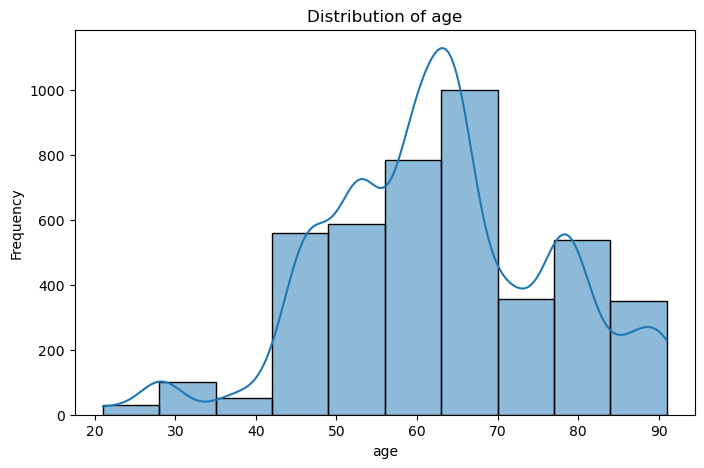

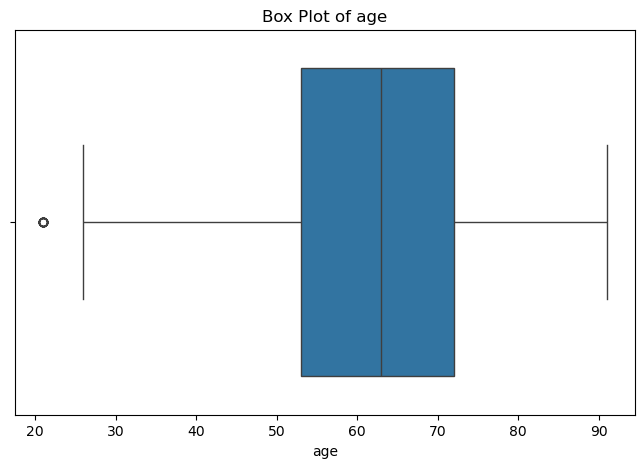

In [95]:
univariate_analysis(cleaned_data, 'age')

* The age distribution is skewed left, indicating a higher proportion of older individuals with a mean age of 62.62 years and a standard deviation of 13.93 years. The data reveals a concentration of individuals between 53 and 72 years, with a peak around the 60-65 year age group, suggesting a predominantly older population.
* The box plot reveals a clear left-skewed distribution of age, characterized by a longer whisker towards the younger end of the age spectrum, indicating a larger proportion of older individuals within the dataset and a median age situated approximately at the 65-year mark.

#### 2. length_of_stay

Summary statistics for length_of_stay:
count    4359.000000
mean        8.242487
std         7.957331
min         0.000000
25%         3.000000
50%         6.000000
75%        11.000000
max        44.000000
Name: length_of_stay, dtype: float64



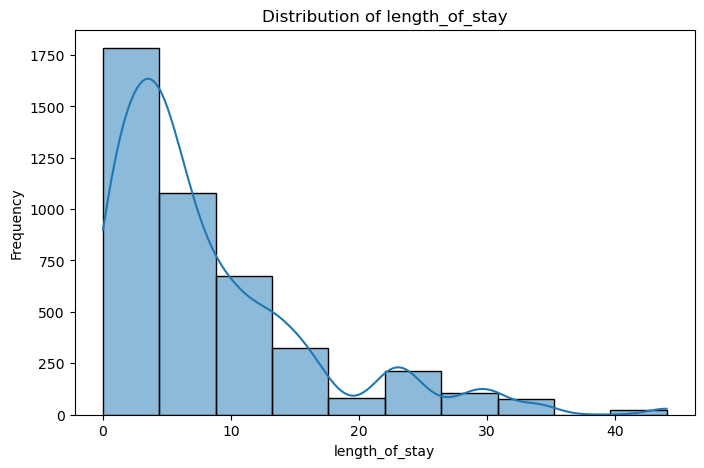

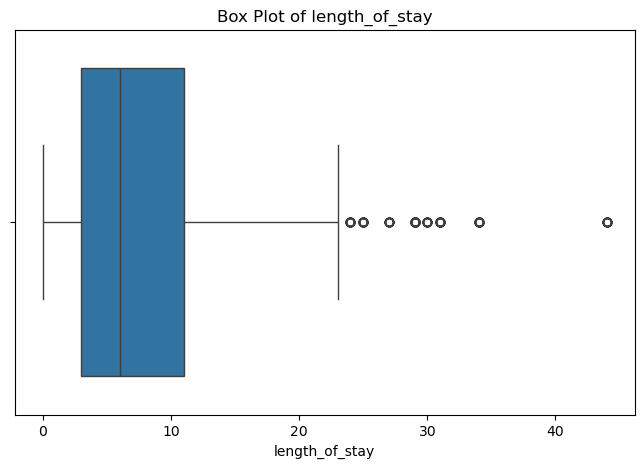

In [39]:
univariate_analysis(cleaned_data, 'length_of_stay')

* The distribution of length of stay is right-skewed, with a mean of 8.24 days and a median likely between 6-7 days (as indicated by the 50th percentile). This suggests that most patients have shorter stays, but there is a significant proportion of patients with longer stays, pulling the mean to the right. The distribution is characterized by a long tail, indicating the presence of outliers with exceptionally long lengths of stay.
* for the box plot,The presence of numerous outliers, representing patients with significantly longer stays, contributes to the elongated right tail of the distribution. This suggests that a small subset of patients account for a disproportionate amount of the overall length of stay.

### b) Bivariate Analysis

Used to investigate the relationship between two variables.

Lets start with a contingency table that shows the frequency distribution of variables

#### 1. Admission type vs Died


In [41]:
# Crosstab for Admission Type vs Died
contingency_table = pd.crosstab(cleaned_data['admission_type'], cleaned_data['died'])
print(contingency_table)


died                         False  True 
admission_type                           
AMBULATORY OBSERVATION          47      0
DIRECT EMER.                   188     39
DIRECT OBSERVATION              86      0
ELECTIVE                       141      0
EU OBSERVATION                 313      0
EW EMER.                      1628    151
OBSERVATION ADMIT              838     88
SURGICAL SAME DAY ADMISSION    189      0
URGENT                         530    121


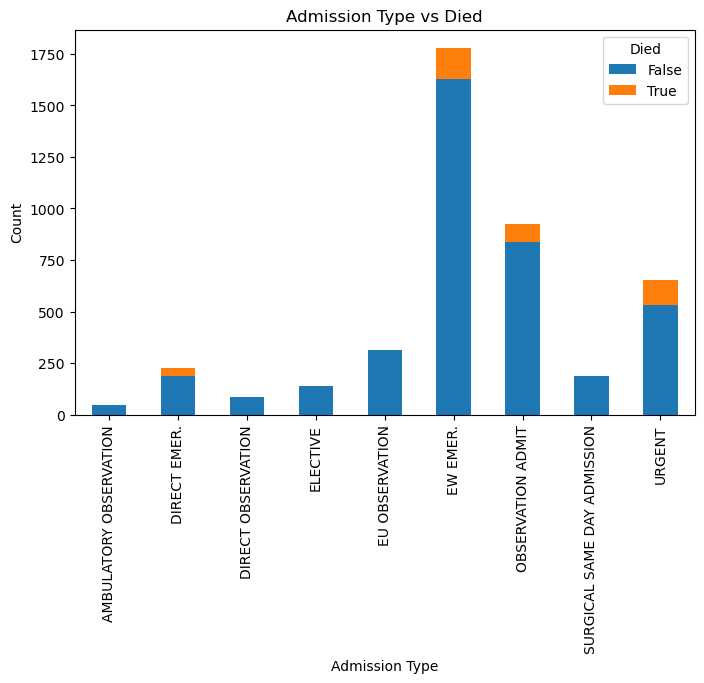

In [42]:
# Stacked bar plot for Admission Type vs Died
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Admission Type vs Died')
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.legend(title='Died')
plt.show()


 The chart shows that admission types like EW EMER. and OBSERVATION ADMIT have higher overall patient counts, with a noticeable proportion of deaths. In contrast, admission types like AMBULATORY OBSERVATION and DIRECT OBSERVATION have lower overall counts and fewer associated deaths. This suggests potential correlations between admission type and mortality rates, with certain admission types possibly indicating higher risks.

In [90]:
#creating a function for Bivariate analysis
def bivariate_categorical_countplot(df, cat_var1, cat_var2):
    """
    Perform bivariate analysis for two categorical features using a count plot.
    
    Parameters:
    df (pd.DataFrame): The dataframe containing the data.
    cat_var1 (str): The first categorical variable.
    cat_var2 (str): The second categorical variable.
    """
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=cleaned_data, x=cat_var1, hue=cat_var2, palette='Set1')
    plt.title(f'{cat_var1} vs. {cat_var2}')
    plt.xlabel(cat_var1)
    plt.ylabel('Count')
    plt.legend(title=cat_var2)
    plt.show()


#### 2. Gender vs Died

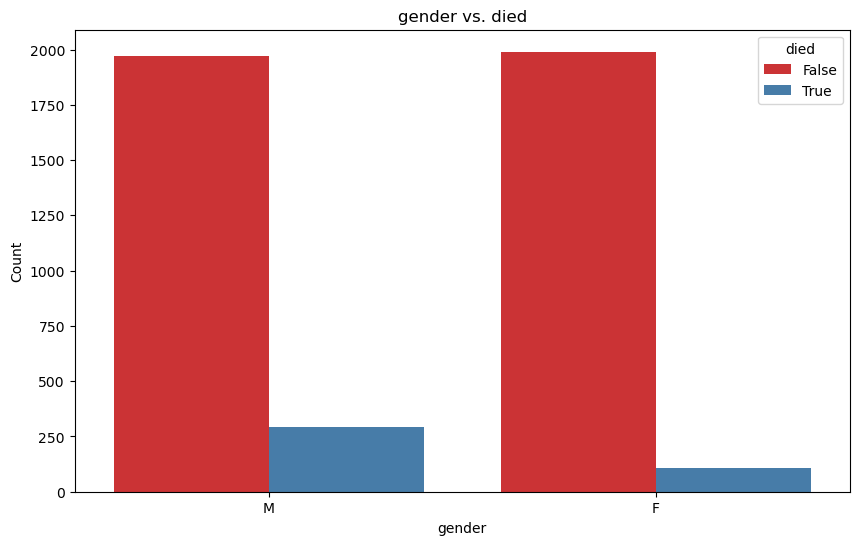

In [52]:

bivariate_categorical_countplot(cleaned_data, 'gender', 'died')

The bar chart illustrates a higher mortality rate among male patients compared to female patients.

#### 3. Marital vs Died

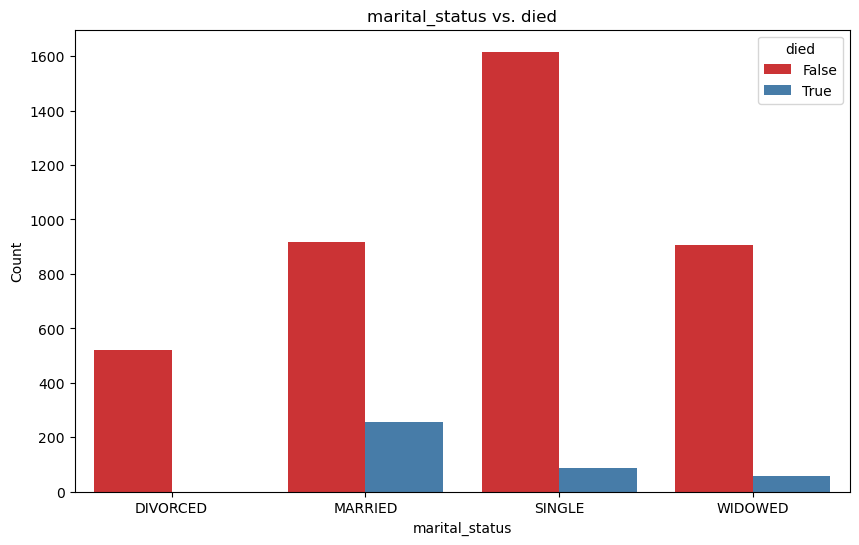

In [58]:
bivariate_categorical_countplot(cleaned_data, 'marital_status', 'died')

The bar chart illustrates that married individuals have the highest count, followed by widowed, divorced, and single individuals, with a disproportionately higher number of deaths among single individuals relative to their population size.

#### 4. Age vs Length of stay

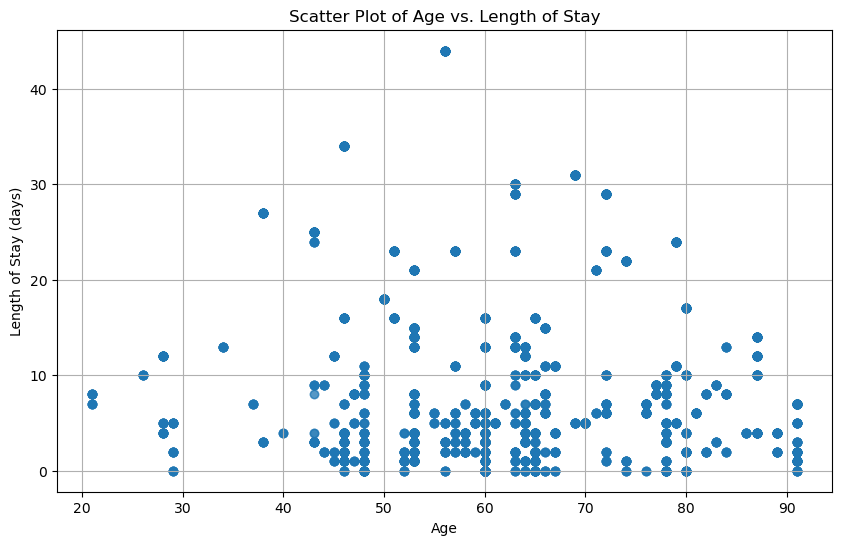

In [81]:
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_data['age'], cleaned_data['length_of_stay'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Length of Stay')
plt.xlabel('Age')
plt.ylabel('Length of Stay (days)')
plt.grid(True)
plt.show()


The scatter plot indicates a weak or no correlation between age and length of stay. There is a wide range of lengths of stay for each age group, suggesting that factors other than age primarily influence the duration of hospitalization.

#### 5. Length of stay vs Marital status

<Figure size 1200x600 with 0 Axes>

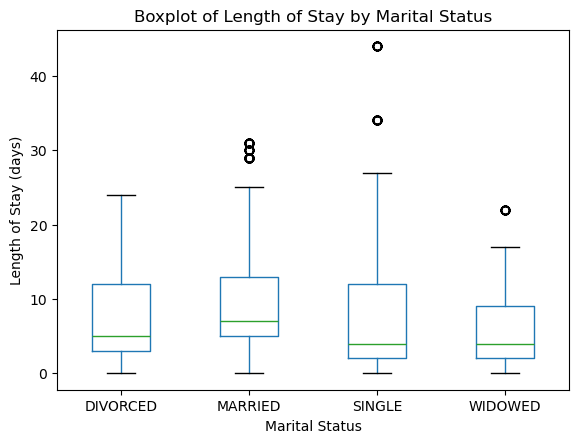

In [82]:
plt.figure(figsize=(12, 6))
cleaned_data.boxplot(column='length_of_stay', by='marital_status', grid=False)
plt.title('Boxplot of Length of Stay by Marital Status')
plt.suptitle('')  # Suppresses the automatic title to make the plot cleaner
plt.xlabel('Marital Status')
plt.ylabel('Length of Stay (days)')
plt.show()


Married individuals tend to have shorter hospital stays compared to divorced, single, and widowed individuals. Additionally, there are outliers in most groups, indicating some patients with exceptionally long hospital stays regardless of marital status. There is also greater variability in length of stay among divorced and widowed individuals.